# UMAP Images

In [1]:
import umap
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

/share/pi/ogevaert/zhang/anaconda3/envs/sample_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
features_df = pd.read_csv('/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_combined_with_fitz.csv')
path = features_df['path'].tolist()
true = features_df['true'].tolist()
pred = features_df['pred'].tolist()
prob = features_df['prob'].tolist()
feat = features_df['feat'].tolist()

features = []
for f in feat:
    print(type(f))
    if type(f) == float:
        print(f)
    else:
        # convert f from string to list
        f = f.replace("[", "")
        f = f.replace("]", "")
        f = f.replace("\n", "")
        f = list(f.split(","))
        features.append(f)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [3]:
float_features = []

for i in features:
    # remove empty strings from list
    i = list(filter(None, i))
    print(len(i)) 
    # convert strings to floats
    temp = [float(j) for j in i]
    float_features.append(temp)


2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048
2048


In [7]:
def draw_umap(data, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data)
    return u

def graph(u):
    # graph umap_out_d2 matching the values to their labels
    label_dict = {"face": 0, "scalp": 1, "neck": 2, "arms": 3, "hands": 4, "chest and abdomen": 5, "back": 6, "legs": 7, "genital and perianal": 8, "feet": 9, "dermoscope": 10}
    opposite_dict = {v: k for k, v in label_dict.items()}
    # map the labels to colors
    color_dict = {0: 'darkorchid', 1: 'violet', 2: 'mediumvioletred', 3: 'red', 4: 'orange', 5: 'cornflowerblue', 6: 'blue', 7: 'green', 8: 'yellow', 9: 'lawngreen', 10: 'black'}
    plt.scatter(u[:, 0], u[:, 1], c=[color_dict[i] for i in true], s=0.5, cmap='Spectral')
    plt.legend(handles=[mpatches.Patch(color=color_dict[i], label=opposite_dict[i]) for i in range(11)], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    # make the x axis and y axis equal ratio
    plt.gca().set_aspect('equal', adjustable='box')
    # make figure larger
     # add x and y axis labels
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.gcf().set_size_inches(10, 10)
    plt.show()
   

In [5]:
u = draw_umap(float_features)

/tmp/ipykernel_3434637/2563276880.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(u[:, 0], u[:, 1], c=[color_dict[i] for i in true], s=0.5, cmap='Spectral')


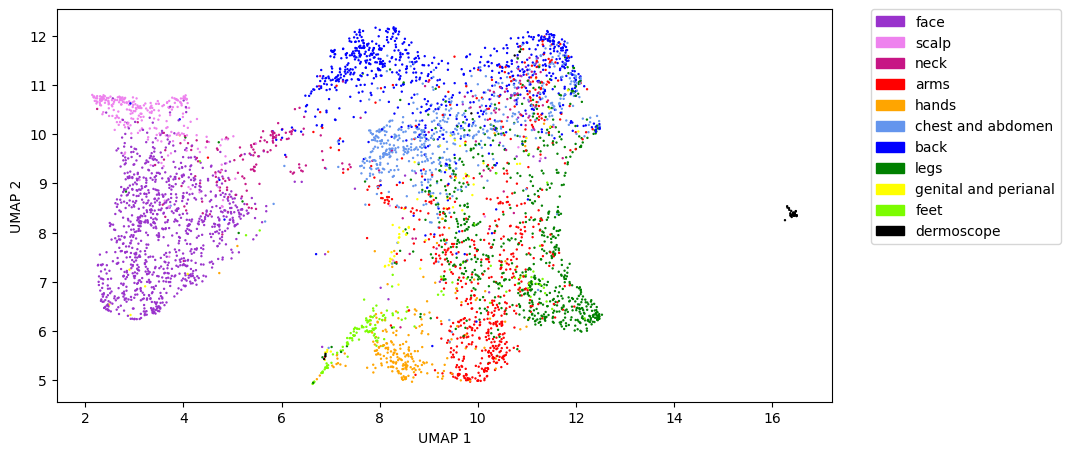

In [8]:
graph(u)

In [9]:
u = draw_umap(float_features, n_neighbors=200)

/tmp/ipykernel_3434637/2563276880.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(u[:, 0], u[:, 1], c=[color_dict[i] for i in true], s=0.5, cmap='Spectral')


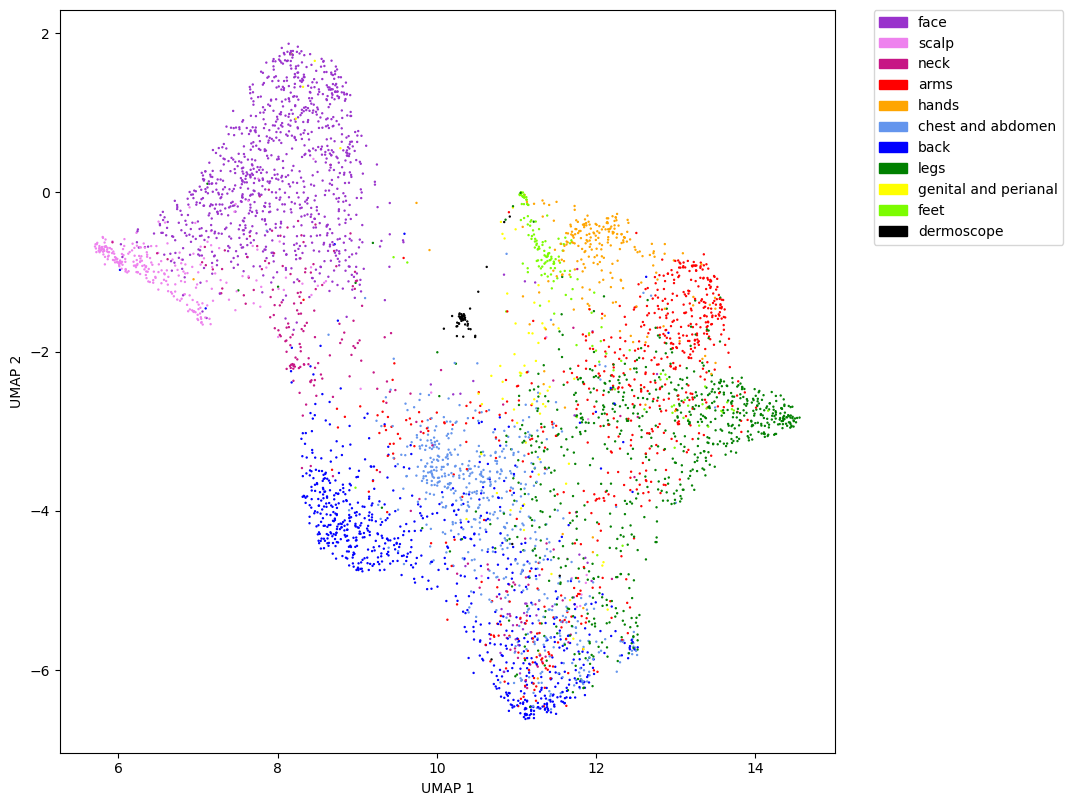

In [10]:
graph(u)

In [11]:
u = draw_umap(float_features, n_neighbors=15, min_dist=0.0)

/tmp/ipykernel_3434637/2563276880.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(u[:, 0], u[:, 1], c=[color_dict[i] for i in true], s=0.5, cmap='Spectral')


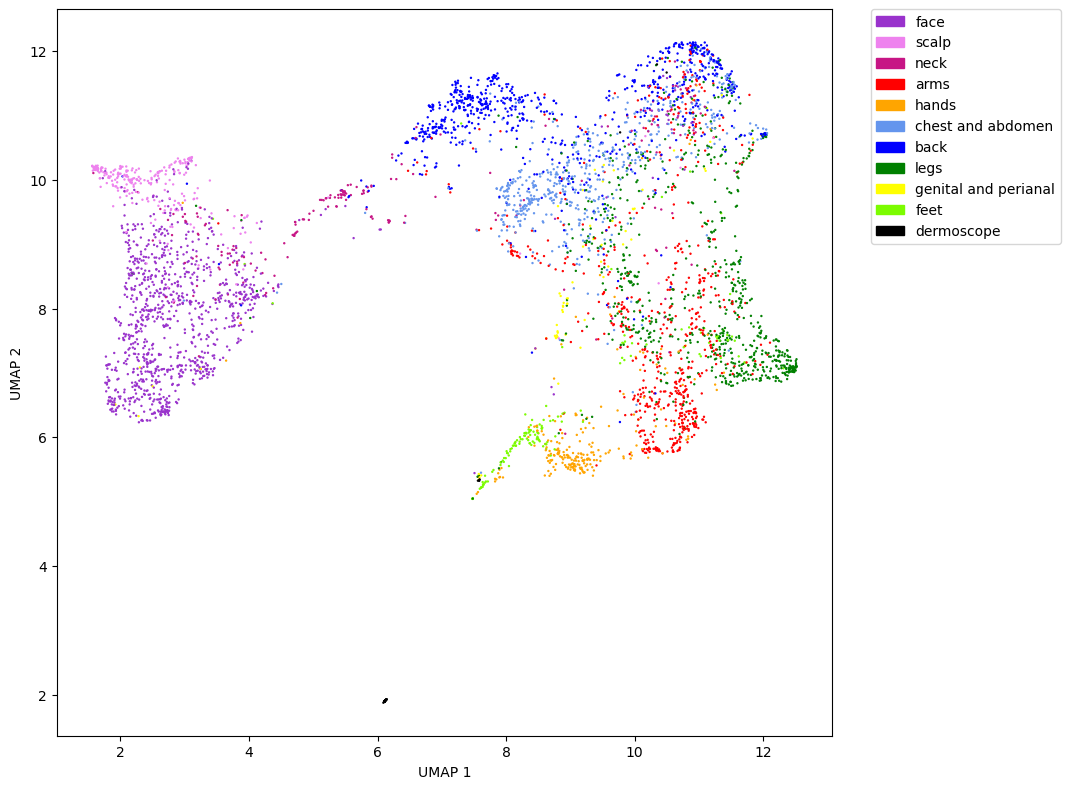

In [12]:
graph(u)

In [13]:
u = draw_umap(float_features, metric='cosine')

/tmp/ipykernel_3434637/2563276880.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(u[:, 0], u[:, 1], c=[color_dict[i] for i in true], s=0.5, cmap='Spectral')


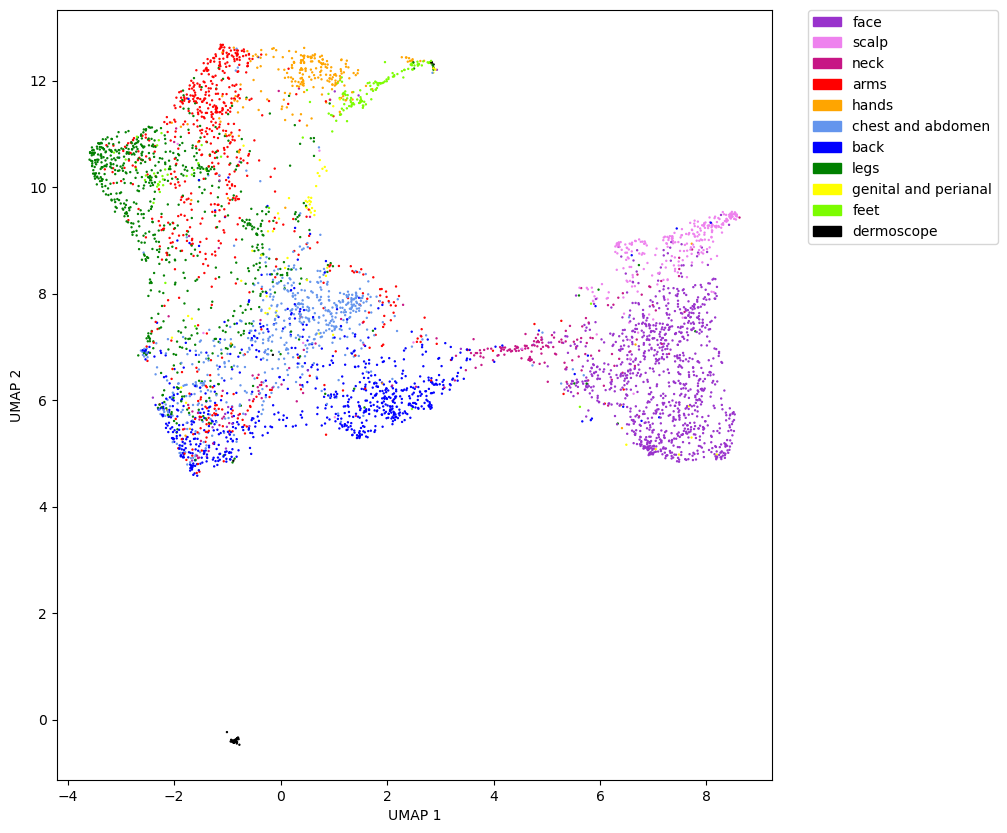

In [14]:
graph(u)

In [15]:
u = draw_umap(float_features, metric='manhattan')

/tmp/ipykernel_3434637/2563276880.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(u[:, 0], u[:, 1], c=[color_dict[i] for i in true], s=0.5, cmap='Spectral')


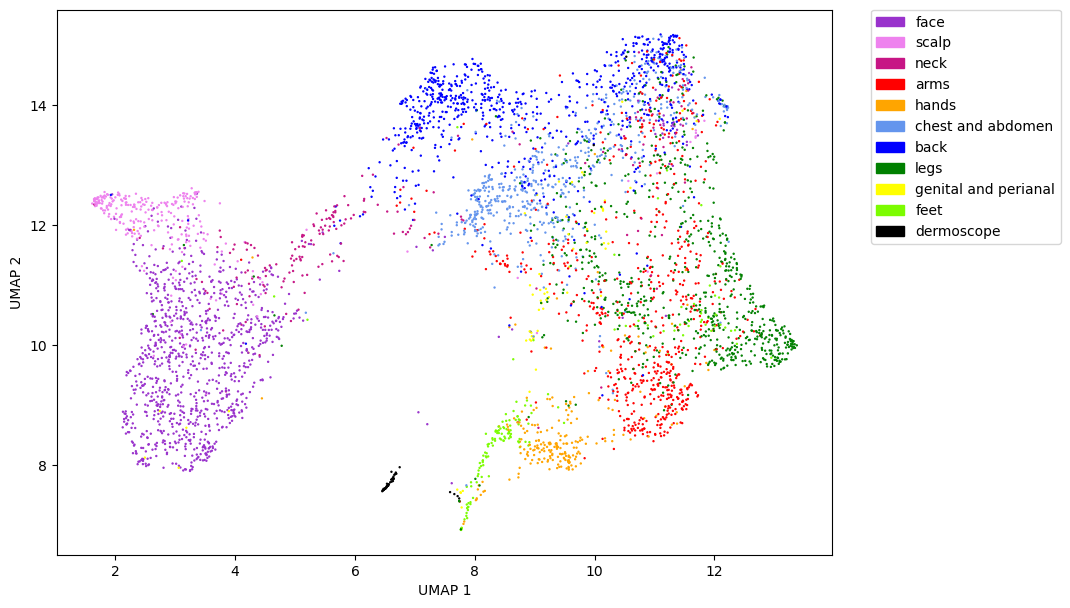

In [16]:
graph(u)

# Accuracy Score Calculations

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns

In [19]:
features_df = pd.read_csv('/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_combined_with_fitz.csv')
path = features_df['path'].tolist()
true = features_df['true'].tolist()
pred = features_df['pred'].tolist()
prob = features_df['prob'].tolist()
feat = features_df['feat'].tolist()

print(len(path), len(true), len(pred), len(prob), len(feat))

4667 4667 4667 4667 4667


In [ ]:
# def build_df(csv_path, img_path):
#     df = pd.read_csv(csv_path, header=0)
#     df['image_file'] = img_path + '/' + df['image_file']
#     return df

# df_test = build_df('/share/pi/ogevaert/zhang/body_classifier/body_test_45k.csv',
#                     '/share/pi/ogevaert/sadee/skin/clinical/som-dermatology-photos-2020')

# # if the image from features_df is not in df_test, remove it from features_df without erroring out
# path = []
# true = []
# pred = []
# prob = []
# for i in range(len(o_path)):
#     if o_path[i] in df_test['image_file'].tolist():
#         path.append(o_path[i])
#         true.append(o_true[i])
#         pred.append(o_pred[i])
#         prob.append(o_prob[i])
# print(len(path), len(true), len(pred), len(prob), len(df_test['image_file'].tolist()))
        

In [26]:
# turn every elemnt in prob from string to list
prob = [i.strip('][').split(', ') for i in prob]
# turn every element in prob from string to float
prob = [[float(j) for j in i] for i in prob]

code for accuracy of top_x classes

In [ ]:
# for each image, find the index of the three highest probabilities
top_3 = []
for i in prob:
    # get the indices of the three highest probabilities
    top_3.append(sorted(range
    (len(i)), key = lambda sub: i[sub])[-3:])

# calculate the accuracy if any of the top 3 predictions is correct
correct = 0
for i in range(len(top_3)):
    if true[i] in top_3[i]:
        correct += 1
print(correct/len(top_3))

# now calculate the accuracy for each class
label_dict = {"face": 0, "scalp": 1, "ear": 2, "neck": 3, "shoulders": 4, "arms_upper": 5, "arms_lower": 6, "hands": 7, "chest": 8, "abdomen": 9, "back_upper": 10, "back_lower": 11, "hips_and_glutes": 12, "genital_and_perianal": 13, "legs_upper": 14, "legs_lower": 15, "feet": 16, "dermoscope": 18 }
opposite_dict = {v: k for k, v in label_dict.items()}
labels = list(label_dict.keys())
accuracy_dict = {}
for i in range(len(labels)):
    accuracy_dict[labels[i]] = 0
for i in range(len(top_3)):
    if true[i] in top_3[i]:
        accuracy_dict[opposite_dict[true[i]]] += 1

# divide by the number of images in each class
for i in accuracy_dict:
    accuracy_dict[i] = accuracy_dict[i]/true.count(label_dict[i])
    print(i, accuracy_dict[i])


code for total accuracy, and f1/accuracy score for each class

In [20]:
label_dict = {"face": 0, "scalp": 1, "neck": 2, "arms": 3, "hands": 4, "chest and abdomen": 5, "back": 6, "legs": 7, "genital and perianal": 8, "feet": 9, "dermoscope": 10}
labels = list(label_dict.keys())
opposite_dict = {v: k for k, v in label_dict.items()}
f1 = f1_score(true, pred, average=None)
# print the median f1 score
print("MEDIAN F1 SCORE")
print(round(np.median(f1), 3))

print("F1 SCORES")
for i in range(len(labels)):
    print(labels[i], round(f1[i], 3))

print("TOTAL ACCURACY")
acc = accuracy_score(true, pred)
# round to 3 decimal places
acc = round(acc, 3)
print(acc)

print("ACCURACY PER CLASS")
accuracy_dict= {}
for i in range(len(labels)):
    accuracy_dict[labels[i]] = 0
for i in range(len(true)):
    if true[i] == pred[i]:
        accuracy_dict[opposite_dict[true[i]]] += 1
for i in accuracy_dict:
    accuracy_dict[i] = accuracy_dict[i]/true.count(label_dict[i])
    print(i, round(accuracy_dict[i], 3))


MEDIAN F1 SCORE
0.796
F1 SCORES
face 0.927
scalp 0.876
neck 0.649
arms 0.752
hands 0.849
chest and abdomen 0.722
back 0.801
legs 0.767
genital and perianal 0.523
feet 0.796
dermoscope 0.99
TOTAL ACCURACY
0.805
ACCURACY PER CLASS
face 0.931
scalp 0.887
neck 0.621
arms 0.762
hands 0.829
chest and abdomen 0.735
back 0.807
legs 0.762
genital and perianal 0.46
feet 0.765
dermoscope 0.98


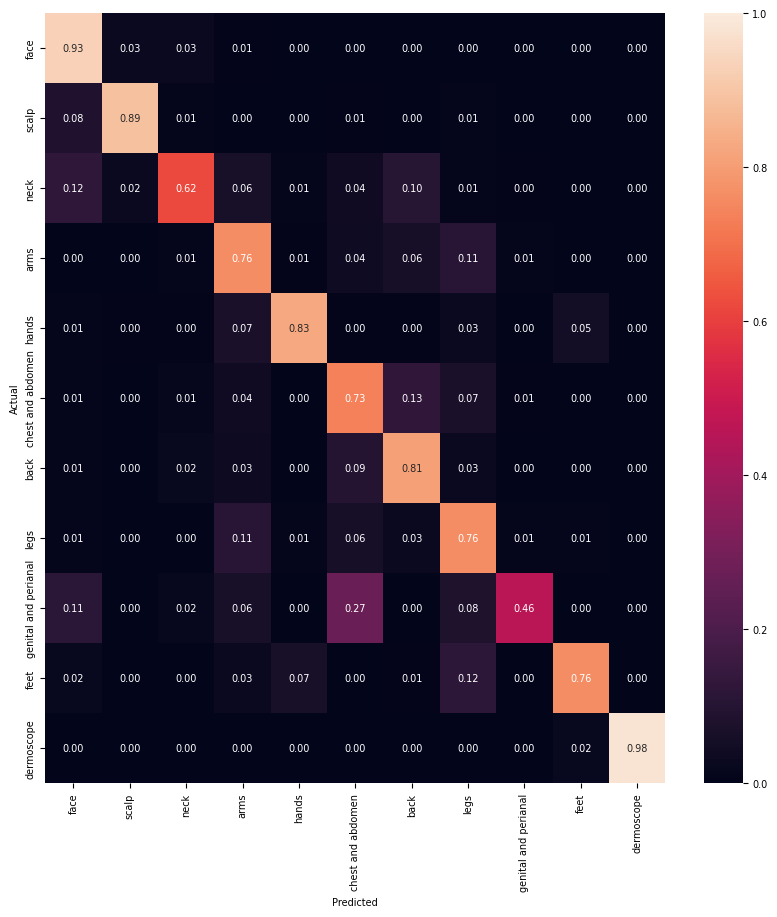

In [21]:
def create_cm(true, pred):
    cm = confusion_matrix(true, pred, normalize='true')
    plt.rcParams.update({'font.size': 7})
    # make the plot bigger
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    # disp.plot(xticks_rotation='vertical', values_format='.2f', cmap='Plasma')
    # # set x and y axis labels
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, vmax=1, vmin=0)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
create_cm(true, pred)

calculate combined accuracies

In [ ]:
old_mapping =  {"face": 0, "scalp": 1, "ear": 2, "neck": 3, "shoulders": 4, "arms_upper": 5, "arms_lower": 6, "hands": 7, "chest": 8, "abdomen": 9, "back_upper": 10, "back_lower": 11, "hips_and_glutes": 12, "genital_and_perianal": 13, "legs_upper": 14, "legs_lower": 15, "feet": 16, "dermoscope": 17 }
new_mapping =  {"face": 0, "scalp": 1, "ear": 0, "neck": 2, "shoulders": 3, "arms_upper": 4, "arms_lower": 4, "hands": 5, "chest": 6, "abdomen": 7, "back_upper": 8, "back_lower": 8, "hips_and_glutes": 9, "genital_and_perianal": 10, "legs_upper": 11, "legs_lower": 11, "feet": 12, "dermoscope": 13}
labels = ["face", "scalp", "neck", "shoulders", "arms", "hands", "chest", "abdomen", "back", "hips and glutes", "genital and perianal", "legs", "feet", "dermoscope"]

new_label_mapping = {"face": 0, "scalp": 1, "neck": 2, "shoulders": 3, "arms": 4, "hands": 5, "chest": 6, "abdomen": 7, "back": 8, "hips and glutes": 9, "genital and perianal": 10, "legs": 11, "feet": 12, "dermoscope": 13}

mapping = {0:0, 1:1, 2:0, 3:2, 4:3, 5:4, 6:4, 7:5, 8:6, 9:7, 10:8, 11:8, 12:9, 13:10, 14:11, 15:11, 16:12, 17:13}
# map the true and predicted labels to the new labels
true_new = [mapping[i] for i in true]
pred_new = [mapping[i] for i in pred]

create_cm(true_new, pred_new)
f1_new = f1_score(true_new, pred_new, average=None)
print("F1 SCORES")
for i in range(len(labels)):
    print(labels[i], round(f1_new[i], 3))

print('MEDIAN F1 SCORE')
print(round(np.median(f1_new), 3))

print('AVERAGE F1 SCORE')
print(round(np.mean(f1_new), 3))

print("ACCURACY PER CLASS")
accuracy_dict= {}
for i in range(len(labels)):
    accuracy_dict[labels[i]] = 0
for i in range(len(true_new)):
    if true_new[i] == pred_new[i]:
        accuracy_dict[labels[true_new[i]]] += 1
for i in accuracy_dict:
    accuracy_dict[i] = accuracy_dict[i]/true_new.count(new_label_mapping[i])
    print(i, round(accuracy_dict[i], 3))

In [ ]:
old_mapping =  {"face": 0, "scalp": 1, "ear": 2, "neck": 3, "shoulders": 4, "arms_upper": 5, "arms_lower": 6, "hands": 7, "chest": 8, "abdomen": 9, "back_upper": 10, "back_lower": 11, "hips_and_glutes": 12, "genital_and_perianal": 13, "legs_upper": 14, "legs_lower": 15, "feet": 16, "dermoscope": 17 }
new_mapping =  {"face": 0, "scalp": 1, "ear": 0, "neck": 2, "shoulders": 3, "arms_upper": 4, "arms_lower": 4, "hands": 5, "chest": 6, "abdomen": 6, "back_upper": 7, "back_lower": 7, "hips_and_glutes": 8, "genital_and_perianal": 9, "legs_upper": 8, "legs_lower": 8, "feet": 10, "dermoscope": 11}
labels = ["face", "scalp", "neck", "shoulders", "arms", "hands", "abdomen", "back", "legs",  "genital and perianal", "feet", "dermoscope"]

mapping = {0:0, 1:1, 2:0, 3:2, 4:3, 5:4, 6:4, 7:5, 8:6, 9:6, 10:7, 11:7, 12:8, 13:9, 14:8, 15:8, 16:10, 17:11}
# map the true and predicted labels to the new labels
true_new = [mapping[i] for i in true]
pred_new = [mapping[i] for i in pred]

create_cm(true_new, pred_new)
f1_new = f1_score(true_new, pred_new, average=None)
print("F1 SCORES")
for i in range(len(labels)):
    print(labels[i], round(f1_new[i], 3))

print('MEDIAN F1 SCORE')
print(round(np.median(f1_new), 3))

print('AVERAGE F1 SCORE')
print(round(np.mean(f1_new), 3))

# Checking Accuracy on the Fitz Dataset

In [22]:
file = '/share/pi/ogevaert/zhang/body_classifier/fitz17k_labeled.csv'
df = pd.read_csv(file)
mapping = {"face": "face", "scalp": "scalp", "ear": "face", "neck": "neck", "shoulders": "shoulders", "arms_upper": "arms", "arms_lower": "arms", "hands": "hands", "chest": "chest and abdomen", "abdomen": "chest and abdomen", "back_upper": "back", "back_lower": "back", "hips and glutes": "legs", "genital and perianal": "genital and perianal", "legs_upper": "legs", "legs_lower": "legs", "feet": "feet", "dermoscope": "dermoscope"}
# map the body_label column to the new labels
df['body_label'] = df['body_label'].map(mapping)
new_label_dict = {"face": 0, "scalp": 1, "neck": 2, "shoulders": 3, "arms": 4, "hands": 5, "chest and abdomen": 6, "back": 7, "legs": 8, "genital and perianal": 9, "feet": 10, "dermoscope": 11}
labels = ["face", "scalp", "neck", "shoulders", "arms", "hands", "chest and abdomen", "back", "genital and perianal", "legs", "feet", "dermoscope"]
# map the true and predicted labels to the new labels
trues = df['body_label'].tolist()
trues = [int(new_label_dict[i]) for i in trues]
# save the csv file with the new labels
df.to_csv('/share/pi/ogevaert/zhang/body_classifier/fitz17k_labeled_combined.csv', index=False)


In [23]:
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

new_label_dict = {"face": 0, "scalp": 1, "neck": 2, "shoulders": 3, "arms": 4, "hands": 5, "chest and abdomen": 6, "back": 7, "legs": 8, "genital and perianal": 9, "feet": 10, "dermoscope": 11}
labels = ["face", "scalp", "neck", "shoulders", "arms", "hands", "chest and abdomen", "back", "genital and perianal", "legs", "feet", "dermoscope"]

trues = pd.read_csv('/share/pi/ogevaert/zhang/body_classifier/fitz17k_labeled_combined.csv')['body_label'].tolist()
trues = [int(new_label_dict[i]) for i in trues]
pred = pd.read_csv('/share/pi/ogevaert/zhang/body_classifier/fitz17k_noundersample.csv')['prediction'].tolist()

f1_new = f1_score(trues, pred, average=None)
# print the median and average f1 scores
print('MEDIAN F1 SCORE')
print(round(np.median(f1_new), 3))

print('AVERAGE F1 SCORE')
print(round(np.mean(f1_new), 3))

print("F1 SCORES")
for i in range(len(labels)):
    print(labels[i], round(f1_new[i], 3))



# print the accuracy per class
accuracy_dict= {}
for i in range(len(labels)):
    accuracy_dict[labels[i]] = 0
for i in range(len(trues)):
    if trues[i] == pred[i]:
        accuracy_dict[labels[trues[i]]] += 1
for i in range(len(labels)):
    if labels[i] != "dermoscope":
        accuracy_dict[labels[i]] = round(accuracy_dict[labels[i]] / trues.count(i), 3)
print('AVERAGE ACCURACY')
print(round(np.mean(list(accuracy_dict.values())), 3))
print('MEDIAN ACCURACY')
print(round(np.median(list(accuracy_dict.values())), 3))
print("ACCURACY PER CLASS")
for i in range(len(labels)):
    print(labels[i], accuracy_dict[labels[i]])


ValueError: Found input variables with inconsistent numbers of samples: [1641, 1624]

/tmp/ipykernel_483102/712368756.py:8: RuntimeWarning: invalid value encountered in divide
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


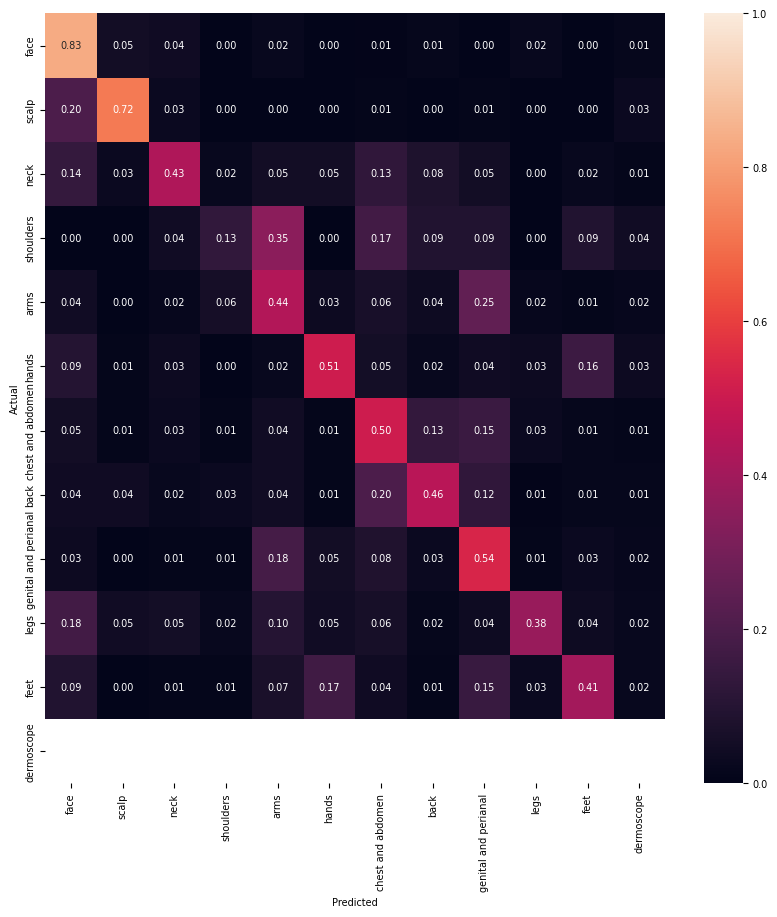

In [27]:
def create_cm(true, pred):
    cm = confusion_matrix(true, pred, normalize='true')
    plt.rcParams.update({'font.size': 7})
    # make the plot bigger
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    # disp.plot(xticks_rotation='vertical', values_format='.2f', cmap='Plasma')
    # # set x and y axis labels
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, vmax=1, vmin=0)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
create_cm(trues, pred)